In [1]:
# Import the Necessary Library 
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout,Conv2D,Flatten,Dense,Activation,MaxPooling2D
from keras import backend as k
import cv2

**step-1-Loading Our Dataset**

In [2]:
#Load The Dataset
mnist = keras.datasets.mnist
(x_train,y_train), (x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


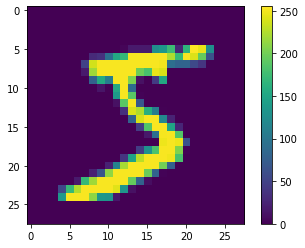

In [3]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

**Step-2-Examine the Size and Dimension of image**

In [4]:
print(x_train.shape)
print('Initial shape or dimension of x_train ',str(x_train.shape))
print("Number of samples in our training data:" +str(len(x_train)))
print("Number of labels in our training data:" +str(len(y_train)))
print("Number of samples in our training data:" +str(len(x_test)))
print("Number of samples in our training data:" +str(len(y_test)))
print("    ")
print("Dimensions of x_train:" + str(x_train[0].shape))
#print("labels of x_train:" + str(y_train.shape))
print("   ")
print("Dimensions of x_test:" + str(x_test[0].shape))
#print("labels of x_test:" + str(y_test.shape))

(60000, 28, 28)
Initial shape or dimension of x_train  (60000, 28, 28)
Number of samples in our training data:60000
Number of labels in our training data:60000
Number of samples in our training data:10000
Number of samples in our training data:10000
    
Dimensions of x_train:(28, 28)
   
Dimensions of x_test:(28, 28)


**Step-3-Looking At the Some Images From the dataset**

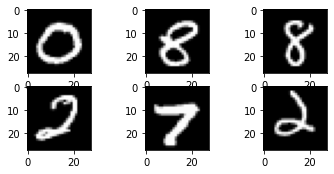

In [5]:
import matplotlib.pyplot as plt
# Plot 6 images not subpplot's arguments are nrows,ncols,index
#we set the color map to gray since our images dataset is grayscale 
plt.subplot(331)
random_num=np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num],cmap=plt.get_cmap('gray'))
plt.subplot(332)
random_num=np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num],cmap=plt.get_cmap('gray'))
plt.subplot(333)
random_num=np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num],cmap=plt.get_cmap('gray'))
plt.subplot(334)
random_num=np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num],cmap=plt.get_cmap('gray'))
plt.subplot(335)
random_num=np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num],cmap=plt.get_cmap('gray'))
plt.subplot(336)
random_num=np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num],cmap=plt.get_cmap('gray'))

plt.show()

**Step-4Preparing Our Dataset For Training**

In [6]:
#Let Store the number rows and columns 
img_rows=x_train[0].shape[0]
img_cols=x_train[0].shape[1]

In [7]:
#Store the shape of a single image
input_shape=(img_rows,img_cols,1)

In [8]:
#Get the dataset in the right shape wee t to reshape it 
x_train=x_train.reshape(x_train.shape[0],img_rows,img_cols,1)
x_test=x_test.reshape(x_test.shape[0],img_rows,img_cols,1)

In [9]:
#Change our image type into the float32 type 
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

In [10]:
#Normalize the data by changing the range from (0,255) to (0,1)
x_train/=255
x_test/=255

In [11]:
print('x_train,shape:',x_train.shape)
print(x_train.shape[0],'train_samples')
print(x_test.shape[0],'test_samples')

x_train,shape: (60000, 28, 28, 1)
60000 train_samples
10000 test_samples


**Step-5 One Hot Encode The Label(y)**

In [12]:
from keras.utils import np_utils
#Now We One Hot Encode the ouput 
y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)
#Lets Count the number of column to our one hot encoding matrix 
print('Number of Classes:' + str(y_test.shape[1]))
num_classes=y_test.shape[1]
num_pixels=x_train.shape[1]*x_train.shape[2]

Number of Classes:10


In [13]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

**Step-6 Creating Our Model**

In [14]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())    

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          3

**Step-7-Ploting Our Model**

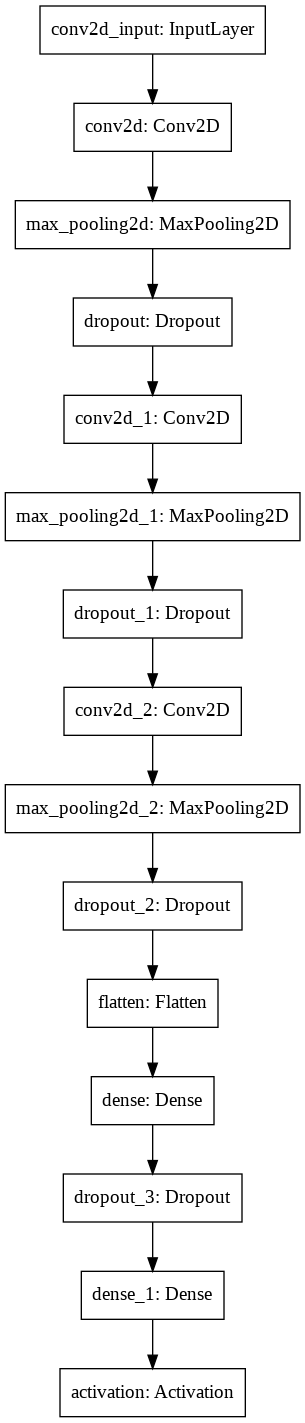

In [15]:
import keras
import tensorflow as tf
tf.keras.utils.plot_model(model,to_file="my_model.png")

**Step-8-Training Our Model**

In [16]:
batch_size=32
epochs=15
history=model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test,y_test))
score=model.evaluate(x_test,y_test,verbose=0)
print('Test Loss',score[0])
print('Test Accurcacy',score[1])

Epoch 1/15
1875/1875 [==============================] - 62s 33ms/step - loss: 1.3163 - accuracy: 0.5337 - val_loss: 0.1480 - val_accuracy: 0.9561
Epoch 2/15
1875/1875 [==============================] - 61s 32ms/step - loss: 0.4022 - accuracy: 0.8806 - val_loss: 0.1043 - val_accuracy: 0.9690
Epoch 3/15
1875/1875 [==============================] - 61s 32ms/step - loss: 0.3181 - accuracy: 0.9074 - val_loss: 0.0979 - val_accuracy: 0.9729
Epoch 4/15
1875/1875 [==============================] - 62s 33ms/step - loss: 0.2807 - accuracy: 0.9187 - val_loss: 0.0856 - val_accuracy: 0.9748
Epoch 5/15
1875/1875 [==============================] - 61s 32ms/step - loss: 0.2518 - accuracy: 0.9274 - val_loss: 0.0774 - val_accuracy: 0.9762
Epoch 6/15
1875/1875 [==============================] - 61s 33ms/step - loss: 0.2448 - accuracy: 0.9297 - val_loss: 0.0697 - val_accuracy: 0.9793
Epoch 7/15
1875/1875 [==============================] - 62s 33ms/step - loss: 0.2336 - accuracy: 0.9324 - val_loss: 0.0677 -

**Step-9-Ploting Our Loss And Accuracy Chart**

<function matplotlib.pyplot.show>

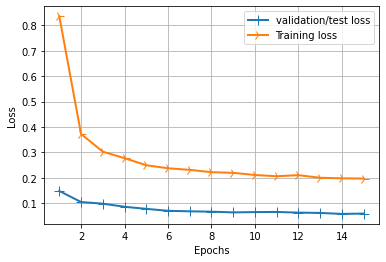

In [17]:
import matplotlib.pyplot as plt
history_dict=history.history
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']
epochs=range(1,len(loss_values)+1)
line1=plt.plot(epochs,val_loss_values,label='validation/test loss')
line2=plt.plot(epochs,loss_values,label='Training loss')
plt.setp(line1,linewidth=2.0,marker='+',markersize=10.0)
plt.setp(line2,linewidth=2.0,marker='4',markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show

<function matplotlib.pyplot.show>

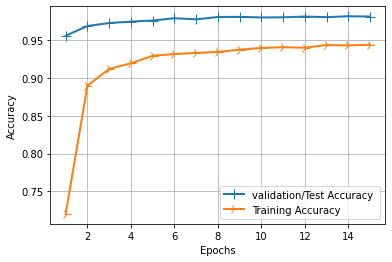

In [18]:
import matplotlib.pyplot as plt
history_dict=history.history
acc_values=history_dict['accuracy']
val_acc_values=history_dict['val_accuracy']
epochs=range(1,len(loss_values)+1)
line1=plt.plot(epochs,val_acc_values,label='validation/Test Accuracy ')
line2=plt.plot(epochs,acc_values,label='Training Accuracy')
plt.setp(line1,linewidth=2.0,marker='+',markersize=10.0)
plt.setp(line2,linewidth=2.0,marker='4',markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show

In [19]:
history.history

{'accuracy': [0.720216691493988,
  0.8900166749954224,
  0.9122166633605957,
  0.9196333289146423,
  0.9295333623886108,
  0.9319333434104919,
  0.9333999752998352,
  0.9347000122070312,
  0.9376166462898254,
  0.9399166703224182,
  0.9409499764442444,
  0.9401999711990356,
  0.9437999725341797,
  0.9432333111763,
  0.9441999793052673],
 'loss': [0.8364207148551941,
  0.3726375102996826,
  0.3028547465801239,
  0.27718043327331543,
  0.2492699921131134,
  0.2373969405889511,
  0.2310648411512375,
  0.22188922762870789,
  0.21936556696891785,
  0.21080733835697174,
  0.20592938363552094,
  0.21019208431243896,
  0.19990596175193787,
  0.19775961339473724,
  0.19669707119464874],
 'val_accuracy': [0.9560999870300293,
  0.968999981880188,
  0.9728999733924866,
  0.9747999906539917,
  0.9761999845504761,
  0.9793000221252441,
  0.9778000116348267,
  0.98089998960495,
  0.9811000227928162,
  0.9803000092506409,
  0.9804999828338623,
  0.9815000295639038,
  0.9807000160217285,
  0.9818999767

**Step-10-Save the Model**

In [26]:
model.save('Mnist.h5')
print('model save')

model save


In [27]:
classifier=tf.keras.models.load_model('Mnist.h5')

**Step-11-Lets Test the model On Test Data**

In [40]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

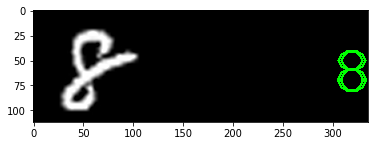

In [44]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
img_row,img_height,img_depth=32,32,3
color=True
scale=8
def draw_test(name,res,input_im,scale,img_row,img_height):
  BLACK=[0,0,0]
  res=int(res)
  if res==0:
    pred='0'
  if res==1:
    pred='1'
  if res==2:
    pred='2'
  if res==3:
    pred='3'
  if res==4:
    pred='4'
  if res==5:
    pred='5'
  if res==6:
    pred='6'
  if res==7:
    pred='7'
  if res==8:
    pred='8'
  if res==9:
    pred='9'    
  
  expanded_image=cv2.copyMakeBorder(input_im,0,0,0,imageL.shape[0]*2,cv2.BORDER_CONSTANT,value=BLACK)
  if color==True:
    expanded_image=cv2.cvtColor(expanded_image,cv2.COLOR_GRAY2BGR)
  cv2.putText(expanded_image,str(pred),(300,80),cv2.FONT_HERSHEY_COMPLEX_SMALL,3,(0,255,0),2)
  plt.imshow(expanded_image)

for i in range(0,10):
  rand=np.random.randint(0,len(x_test))
  input_im=x_test[rand]
  imageL=cv2.resize(input_im,None,fx=4,fy=4,interpolation=cv2.INTER_CUBIC)
  input_im=input_im.reshape(1,28,28,1)

  res=str(classifier.predict_classes(input_im,1,verbose=0)[0])
  draw_test('prediction',res,imageL,scale,img_row,img_height)
  cv2.waitKey(100)

cv2.destroyAllWindows()
